<br>
<center><font size = 10> Logistic Regression </font></center>
<br>

<img src = "./img/logistic_regression.png">

In [110]:
## options

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")

## Library Load

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import collections
from matplotlib.colors import LogNorm
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import sys
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.animation as animation

#init_notebook_mode(connected=True)
np.set_printoptions(threshold=np.inf)

logistic = LogisticRegression()


In [112]:
def mixture(mean = None , cov = None , p = None , N = 200 ) :
    X = np.random.choice( list(np.arange(0,len(p))) , size= N , p = p )
    count = np.bincount(X)
    gm = np.concatenate([np.random.multivariate_normal(mean[x], cov[x], count[x]) for x in np.arange(len(p))])
    return gm

In [113]:
train_n = 400
## mix 1 
mean = [(0,4) , (0,2), (3,4) , (0.5,1.5) , (1, 2.5)]
cov = [np.diag([1.0,1.0])] * 5
p =[ 0.3,0.3,0.2 ,0.1,0.1]
mix_1 = mixture(mean = mean , cov = cov , p =  p , N= train_n)
## mix 2 
p =[ 0.2,0.3,0.2 ,0.2,0.1]
mean = [(-1.,-1) , (3.5 ,-0.5), (3,3) , (3.5,1.5) , (3.0, 1.5)]
cov = [np.diag([1.0,1.0])] * 5
mix_2 = mixture(mean = mean , cov = cov , p =  p, N= train_n)
train_label = ["red"] * train_n  + ["blue"]  * train_n
train_target = [1] * train_n  + [ 0 ]  * train_n 
total  = np.concatenate((mix_1 , mix_2), axis = 0)

In [114]:
grid_n = 2000
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:(train_n+1), :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[train_n: (2*train_n + 1), :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))

In [115]:
D = Z2 - Z1

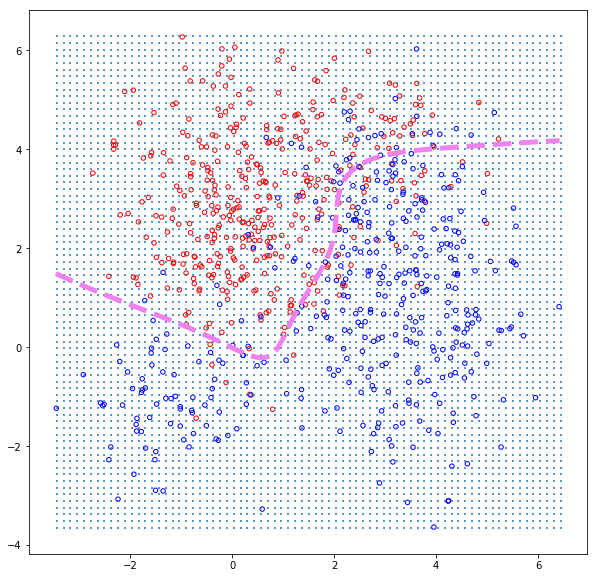

In [116]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.contour(X , Y ,  D  , colors='violet' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=4, marker = 1)
plt.show()

In [117]:
logistic.fit(total , train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<center><font size = 5> Logistic Regression Decision Boundary Visualization</font></center><br>
<br>

<div>
<div style = "width : 29%; float : left">
    <center><font size = 3>$log(\frac{p(X)}{1-p(X)})=$</font></center><br>
    <center>$\beta_0 + \beta_1X_1+ \beta_2X_2$</center>
</div>
    <div style = "width : 33%; float : left">
        <center><font size = 3>$log(\frac{p(X)}{1-p(X)})=$</font></center><br>
    <center>$\beta_0 + \beta_1X_1+ \beta_2X_2  + \beta_3X_1 X_2+ \beta_4 X_1^2+ \beta_5 X_2^2$</center>
</div>
    <div style = "width : 38%; float : left">
        <center><font size = 3>$log(\frac{p(X)}{1-p(X)})=$</font></center><br>
    <center>$\beta_0 + \beta_1X_1+ \beta_2X_2  + \beta_3X_1 X_2+ \beta_4 X_1^2+ \beta_5 X_2^2+ \beta_6X_1^2 X_2+ \beta_7X_1 X_2^2+ \beta_8 X_1^3+ \beta_9 X_2^3$</center>
    </div>
</div>

<br>
<br>
<br>
<br>
<br>
<br>


<div>
    <center>$P(X) = \frac{1}{2}일 때,  log(\frac{\frac{1}{2}}{\frac{1}{2}}) = log(1) = 0$</center>
    <center>$\beta_0 + \beta_1X_1 + ... + \beta_pX_p = 0$ 이 되는  x가 'Decision Boundary'가 된다. </center>
</div>

In [118]:
grid_n = 2000
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
D = logistic.decision_function(XX)
D = D.reshape(X.shape)

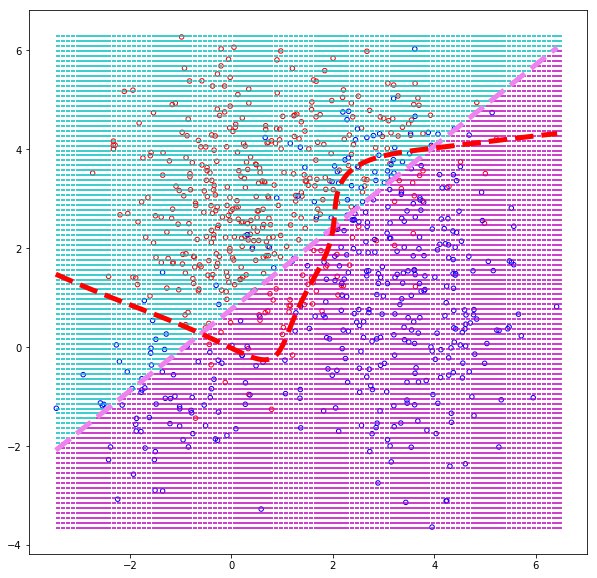

In [119]:
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:(train_n+1), :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[train_n: (2*train_n + 1), :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))
D_true = Z2 - Z1
## 시각화
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.contour(X , Y ,  D  , colors='violet' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.contour(X , Y ,  D_true  , colors='red' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )
x = np.linspace(x_min , x_max , num = 100)
y = np.linspace(y_min, y_max  , num = 100)
x, y = np.meshgrid(x , y )
xx = np.array([x.ravel(), y.ravel()]).T
grid_D = logistic.decision_function(xx)
grid_class = np.where(grid_D > 0 , "c","m")
plt.scatter(x,y, s=20, c= grid_class, marker = 1)
plt.show()

In [9]:
x1x2 = total[:,0] * total[:,1]
x1x2 = x1x2.reshape(-1,1)
total2 = np.concatenate((total , x1x2,  np.square(total)), axis = 1)

In [34]:
logistic.fit(total2 , train_target)
grid_n = 2000
x_min, x_max = total2[:,0].min() - .01, total2[:,0].max() + .01
y_min, y_max = total2[:,1].min() - .01, total2[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
X2 , Y2 = np.meshgrid(np.square(x), np.square(y))
c = x*y
xy =  np.tile( c , grid_n)
XX = np.array([X.ravel(), Y.ravel(),xy.ravel() ,X2.ravel(), Y2.ravel()]).T
#XX = np.array([X.ravel(), Y.ravel()]).T
D = logistic.decision_function(XX)
D = D.reshape(X.shape)

/home/gpuadmin/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



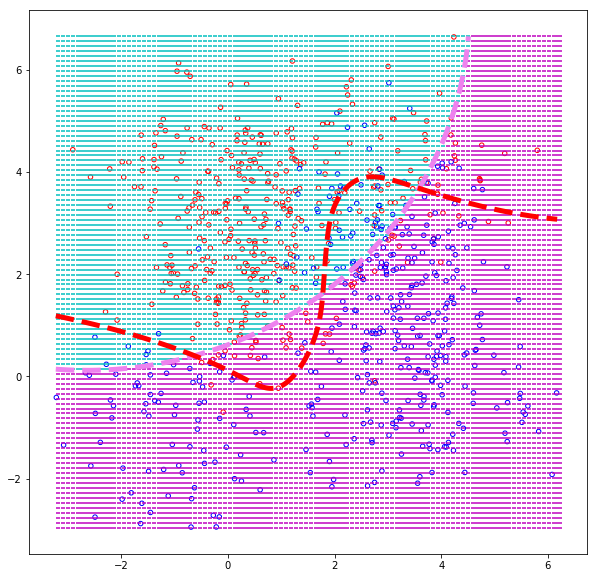

In [35]:
XX = np.array([X.ravel(), Y.ravel()]).T
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:(train_n+1), :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[train_n: (2*train_n + 1), :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))
D_true = Z2 - Z1
## 시각화
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.contour(X , Y ,  D  , colors='violet' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.contour(X , Y ,  D_true  , colors='red' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )

grid_n2 = 100
x = np.linspace(x_min , x_max , num = grid_n2)
y = np.linspace(y_min,  y_max  , num = grid_n2)
X , Y = np.meshgrid(x , y )
x2 , y2 = np.meshgrid(np.square(x), np.square(y))
c = x*y
xy =  np.tile( c , grid_n2)
xx = np.array([X.ravel(), Y.ravel(),xy.ravel() ,x2.ravel(), y2.ravel()]).T
grid_D = logistic.decision_function(xx)
grid_class = np.where(grid_D > 0 , "c","m")
plt.scatter(X , Y  , s=20, c= grid_class, marker = 1)
plt.show()

In [37]:
x1x2 = total[:,0] * total[:,1]
x1x2 = x1x2.reshape(-1,1)
total2 = np.concatenate((total , x1x2,  np.square(total)), axis = 1)
x1_2x2 = np.square(total[:,0]) * total[:,1]
x1_2x2 = x1_2x2.reshape(-1,1)
x1x2_2 = total[:,0] * np.square(total[:,1])
x1x2_2 = x1x2_2.reshape(-1,1)
total3 = np.concatenate((total2 , x1_2x2 , x1x2_2 , np.power(total,3)), axis = 1)

In [38]:
logistic.fit(total3 , train_target)
grid_n = 2000
x_min, x_max = total2[:,0].min() - .01, total2[:,0].max() + .01
y_min, y_max = total2[:,1].min() - .01, total2[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
X2 , Y2 = np.meshgrid(np.square(x), np.square(y))
X3 , Y3 = np.meshgrid(np.power(x,3), np.power(y,3))
c = x*y
xy =  np.tile( c , grid_n)
c2 = np.square(x)*y
x_2y =  np.tile( c2 , grid_n)
c3 = x*np.square(y)
xy_2 =  np.tile( c3 , grid_n)
XX = np.array([
    X.ravel(), Y.ravel(),
    xy.ravel() ,X2.ravel(), Y2.ravel(), 
    x_2y.ravel() , xy_2.ravel() , X3.ravel(), Y3.ravel()]).T

D = logistic.decision_function(XX)
D = D.reshape(X.shape)

/home/gpuadmin/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



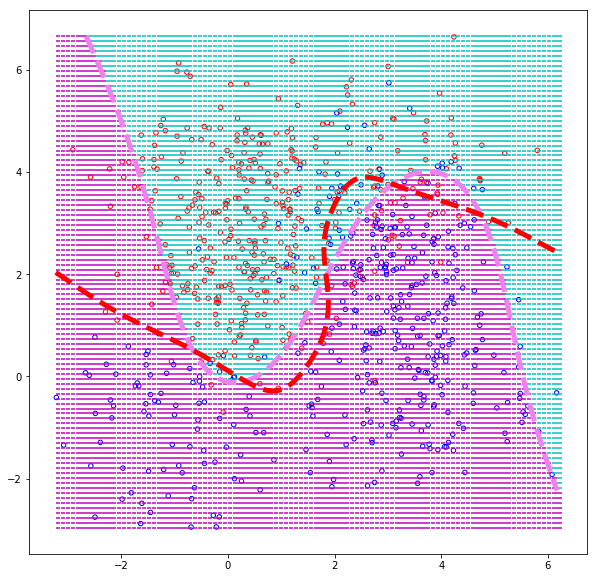

In [39]:
XX = np.array([X.ravel(), Y.ravel()]).T
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:(train_n+1), :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[train_n: (2*train_n + 1), :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))
D_true = Z2 - Z1
## 시각화
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.contour(X , Y ,  D  , colors='violet' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.contour(X , Y ,  D_true  , colors='red' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= train_label )

grid_n2 = 100
x = np.linspace(x_min , x_max , num = grid_n2)
y = np.linspace(y_min,  y_max  , num = grid_n2)
X , Y = np.meshgrid(x , y )
x2 , y2 = np.meshgrid(np.square(x), np.square(y))
x3 , y3 = np.meshgrid(np.power(x,3), np.power(y,3))
c = x*y
xy =  np.tile( c , grid_n2)
xy =  np.tile( c , grid_n2)
c2 = np.square(x)*y
x_2y =  np.tile( c2 , grid_n2)
c3 = x*np.square(y)
xy_2 =  np.tile( c3 , grid_n2)
xx = np.array([
    X.ravel(), Y.ravel(),
    xy.ravel() ,x2.ravel(), y2.ravel(), 
    x_2y.ravel() , xy_2.ravel() , x3.ravel(), y3.ravel()]).T

grid_D = logistic.decision_function(xx)
grid_class = np.where(grid_D > 0 , "c","m")
plt.scatter(X , Y  , s=20, c= grid_class, marker = 1)
plt.show()

In [80]:
def GLM_Decision_Boundary(train_n = 400 , grid_n = 2000 , grid_n2 = 100 , fit_data = None , p= None , sub= None , total = None ) :
    logistic.fit(fit_data , train_target)
    x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
    y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
    x = np.linspace(x_min , x_max , num = grid_n)
    y = np.linspace(y_min , y_max  , num = grid_n)
    X, Y = np.meshgrid(x, y)
    
    if p == 1 :
        XX = np.array([X.ravel(), Y.ravel()]).T
    elif p == 2 :
        X2 , Y2 = np.meshgrid(np.square(x), np.square(y))
        c = x*y
        xy =  np.tile( c , grid_n)
        XX = np.array([X.ravel(), Y.ravel(),xy.ravel() ,X2.ravel(), Y2.ravel()]).T
    elif p == 3 :
        X2 , Y2 = np.meshgrid(np.square(x), np.square(y))
        X3 , Y3 = np.meshgrid(np.power(x,3), np.power(y,3))
        c = x*y
        xy =  np.tile( c , grid_n)
        c2 = np.square(x)*y
        x_2y =  np.tile( c2 , grid_n)
        c3 = x*np.square(y)
        xy_2 =  np.tile( c3 , grid_n)
        XX = np.array([
            X.ravel(), Y.ravel(),
            xy.ravel() ,X2.ravel(), Y2.ravel(), 
            x_2y.ravel() , xy_2.ravel() , X3.ravel(), Y3.ravel()]).T
    
    D = logistic.decision_function(XX)
    D = D.reshape(X.shape)
    gmm = GaussianMixture(n_components=5, covariance_type='diag')
    gmm.fit(total[0:(train_n+1), :])
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = gmm.score_samples(XX)
    Z2 = Z.reshape((grid_n,grid_n))
    gmm = GaussianMixture(n_components=5, covariance_type='diag')
    gmm.fit(total[train_n: (2*train_n + 1), :])
    Z = gmm.score_samples(XX) # 
    Z1 = Z.reshape((grid_n,grid_n))
    D_true = Z2 - Z1
    ## 시각화
    ax[sub].contour(X , Y ,  D  , colors='violet' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
    ax[sub].contour(X , Y ,  D_true  , colors='red' , linestyles  ="dashed" , linewidths  = 5 , levels = [0.0] )
    ax[sub].scatter(total[:,0] , total[:,1] ,
                s=20, facecolors='none', edgecolors= train_label )
    x = np.linspace(x_min , x_max , num = 100)
    y = np.linspace(y_min, y_max  , num = 100)
    X , Y = np.meshgrid(x , y )
    if p ==1 :
         xx = np.array([X.ravel(), Y.ravel()]).T
    elif p == 2 :
        x2 , y2 = np.meshgrid(np.square(x), np.square(y))
        c = x*y
        xy =  np.tile( c , grid_n2)
        xx = np.array([X.ravel(), Y.ravel(),xy.ravel() ,x2.ravel(), y2.ravel()]).T
    elif p == 3 :
        x2 , y2 = np.meshgrid(np.square(x), np.square(y))
        x3 , y3 = np.meshgrid(np.power(x,3), np.power(y,3))
        c = x*y
        xy =  np.tile( c , grid_n2)
        xy =  np.tile( c , grid_n2)
        c2 = np.square(x)*y
        x_2y =  np.tile( c2 , grid_n2)
        c3 = x*np.square(y)
        xy_2 =  np.tile( c3 , grid_n2)
        xx = np.array([
            X.ravel(), Y.ravel(),
            xy.ravel() ,x2.ravel(), y2.ravel(), 
            x_2y.ravel() , xy_2.ravel() , x3.ravel(), y3.ravel()]).T
   
    grid_D = logistic.decision_function(xx)
    grid_class = np.where(grid_D > 0 , "c","m")
    ax[sub].scatter(X,Y, s=20, c= grid_class, marker = 1)
    if p == 1 :
        text2 = r"$\beta_0 + \beta_1X_1+ \beta_2X_2$"
    elif p == 2 :
        text2 = r"$\beta_0 + \beta_1X_1+ \beta_2X_2  + \beta_3X_1 X_2+ \beta_4 X_1^2+ \beta_5 X_2^2$"
    elif p == 3 :
        text2 = r"$\beta_0 + \beta_1X_1+ \beta_2X_2  + \beta_3X_1 X_2+ \beta_4 X_1^2+ \beta_5 X_2^2+ \beta_6X_1^2 X_2+ \beta_7X_1 X_2^2+ \beta_8 X_1^3+ \beta_9 X_2^3$"
    ax[sub].set_title("{}".format(text2) , fontsize = 20)
    ax[sub].axis('off')
    
    

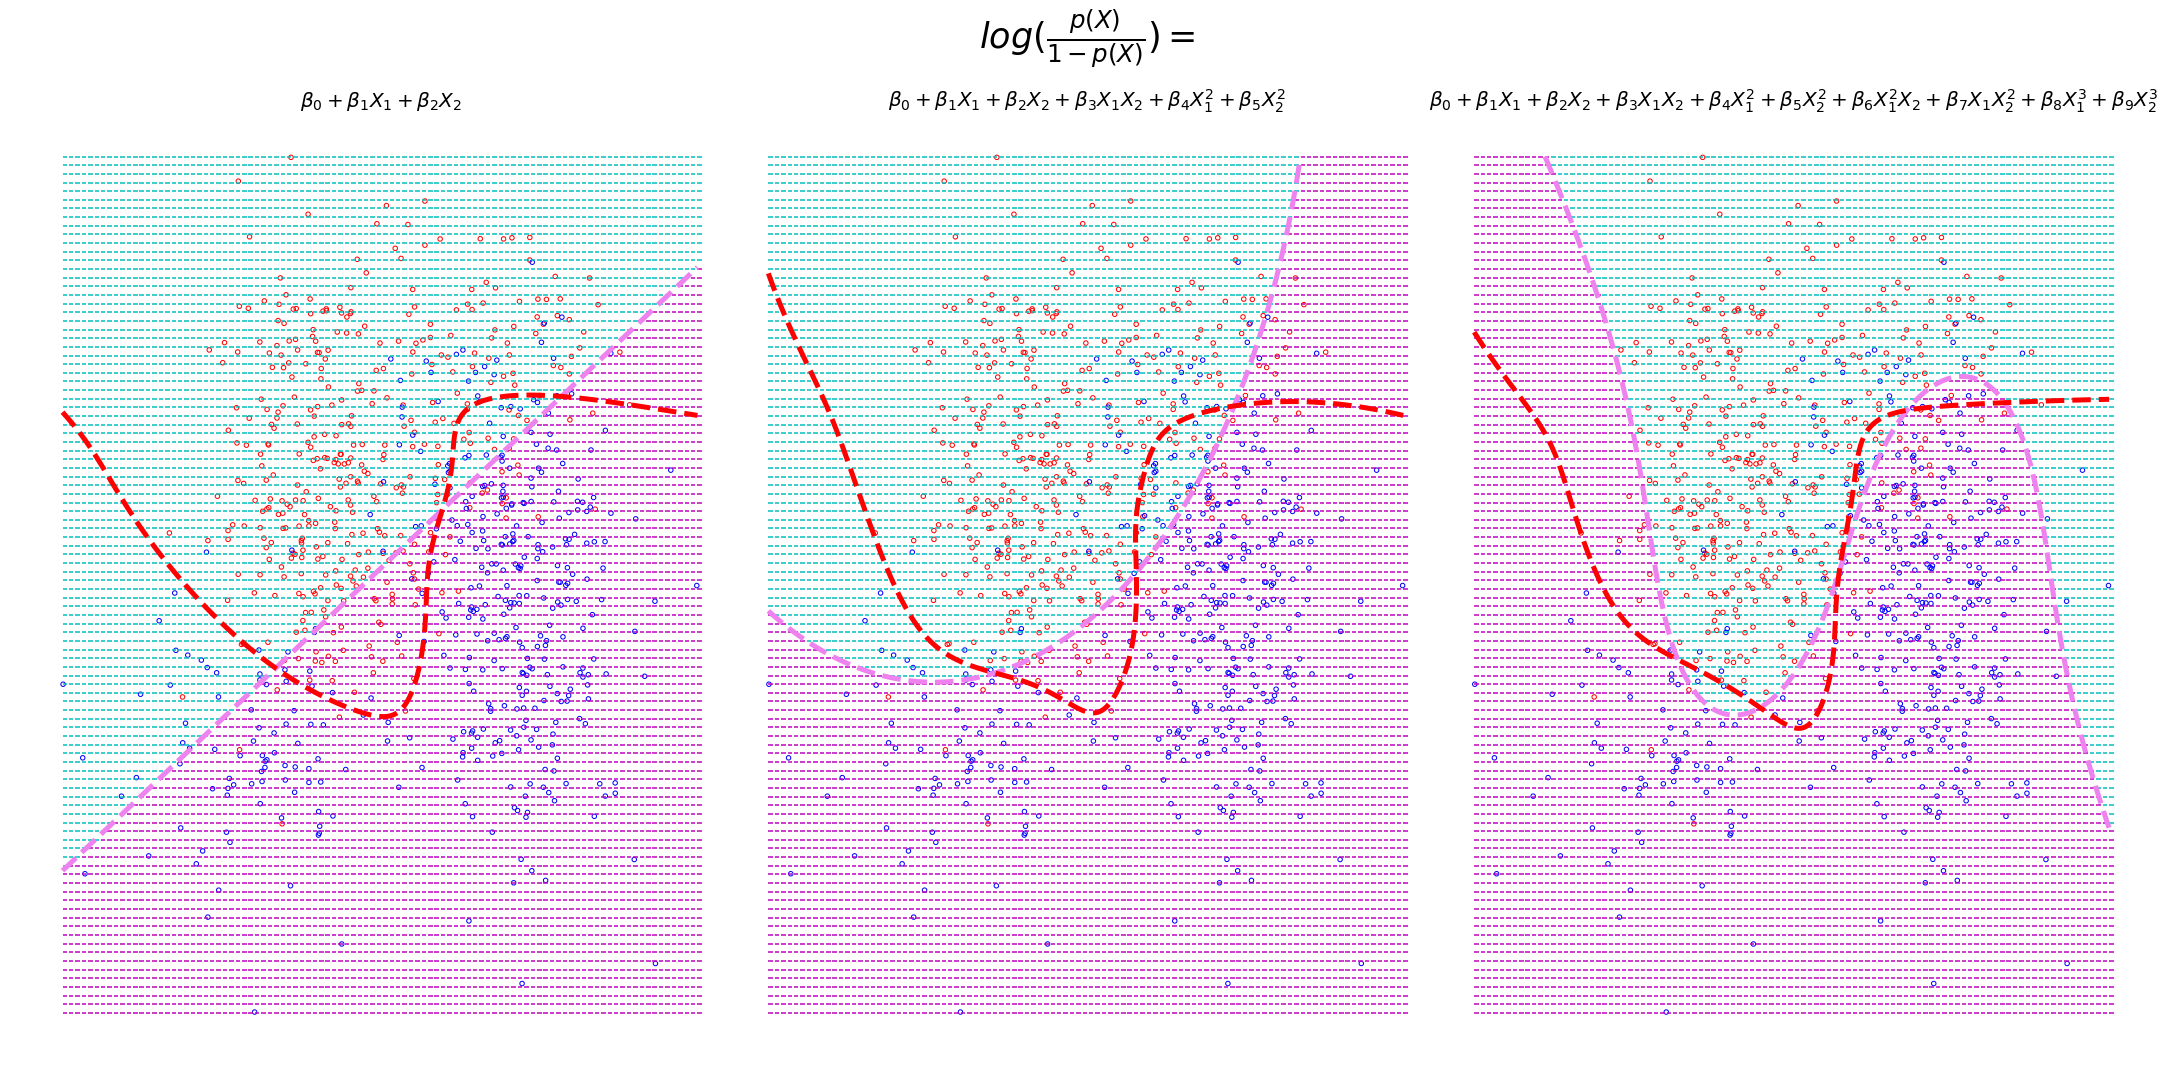

In [81]:


fig, ax = plt.subplots(1 , 3 , figsize = (30, 15))
fig.tight_layout()
sub = 0
total = np.concatenate((mix_1 , mix_2), axis = 0)
for i in [1,2,3] : 
    if i == 1 :
        total2  =  total
    elif i == 2 :
        x1x2 = total[:,0] * total[:,1]
        x1x2 = x1x2.reshape(-1,1)
        total2 = np.concatenate((total , x1x2,  np.square(total)), axis = 1)
    elif i == 3 :
        x1_2x2 = np.square(total[:,0]) * total[:,1]
        x1_2x2 = x1_2x2.reshape(-1,1)
        x1x2_2 = total[:,0] * np.square(total[:,1])
        x1x2_2 = x1x2_2.reshape(-1,1)
        total2 = np.concatenate((total2 , x1_2x2 , x1x2_2 , np.power(total,3)), axis = 1)
    GLM_Decision_Boundary(train_n = 400 , grid_n = 2000 , grid_n2 = 100 ,  fit_data = total2 , total = total , 
                          p= i , sub= sub )
    sub +=1
plt.text(x=0.5, y=0.96, s=r"$log(\frac{p(X)}{1-p(X)})=$",
         fontsize=35, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.90, wspace=0.001 , right = 0.99  , left = 0.01  , hspace = 0.001)
plt.show()


## 아직 해보고 싶은 것

1. tensorflow 를 이용해서 gradient descent 방법으로 최적화해서 해보기 (0)
2. 그렇게 했을 때 loss를 저장해서 loss surface를 그려서 최적화하는 과정 animation으로 해보기  (animation은 ....)
3. 일부러 x1의 y에 따라서 크게 줬을 떄 최적화가 잘 안된다고 했는데 실제로 어떤지 해보기 (

In [532]:
import tensorflow as tf , numpy as np , matplotlib.pyplot as plt

train_n = 300

train_target = [1] * train_n  + [ 0 ]  * train_n 
train_color = ["red"] * train_n  + [ "blue" ]  * train_n 

a = np.random.normal(loc = -2.0, scale= 1.0 , size= train_n)

b = np.random.normal(loc = 2.0 , scale= 1.0 , size= train_n)

total = np.concatenate((a,b))[: , np.newaxis]

t = np.vstack((np.zeros((300,1)), 
               np.ones((300,1))))


In [533]:
target_y = np.array(train_target)[: , np.newaxis]
train_color = np.array(train_color)[:,np.newaxis]

In [534]:
total  = np.concatenate((total ,target_y , train_color ), axis = 1)

In [535]:
np.random.shuffle(total)

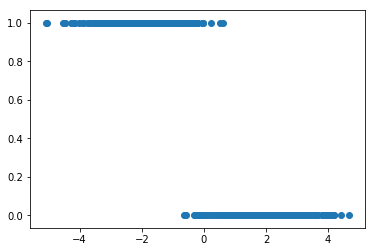

In [536]:
plt.scatter(total[:,0].astype(float), total[:,1].astype(float))
plt.show()

In [537]:

target_y = total[:,1].astype(float) 
train_color = total[:,2]
total = total[:,0].astype(float)
target_y = target_y[:,np.newaxis]
total = total[:,np.newaxis]

In [538]:
tf.reset_default_graph()
X_dim = total.shape[1]
y_dim = 1 
X = tf.placeholder(tf.float32, shape=[None, X_dim], name="X")
Y = tf.placeholder(tf.float32, shape=[None, y_dim], name="Y")


In [539]:
Weight = tf.get_variable("Weight" , shape = [X_dim , 1] , dtype = tf.float32 ,
                    initializer = tf.keras.initializers.RandomNormal(mean=0 , stddev= 5))
Bias = tf.get_variable("Bias" , shape = [1] , dtype = tf.float32 ,
                    initializer = tf.keras.initializers.RandomNormal(mean=0 , stddev= 5))

In [540]:
h = tf.matmul(X , Weight) + Bias
hypo = tf.sigmoid(h)

In [541]:

cost = -tf.reduce_mean(Y * tf.log( tf.clip_by_value(hypo , 1e-8 , 0.99999 )) + 
                       (1 - Y) * tf.log(1 - tf.clip_by_value(hypo , 1e-8 , 0.99999 )))
optimizier = tf.train.GradientDescentOptimizer(learning_rate= 0.1)
train = optimizier.minimize(cost)

pred = tf.cast(hypo > 0.5 , dtype= tf.float32)
acc = tf.reduce_mean( tf.cast( tf.equal(pred , Y) , dtype = tf.float32 ))

In [542]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [543]:
EPOCH = 10000
Loss = []
ACC = []
W = []
B = []
for i in range(EPOCH) :
    _ , loss  , Acc , w , b = sess.run([train , cost , acc , Weight , Bias ] , feed_dict = {X : total, Y : target_y})
    Loss.append(loss)
    ACC.append(Acc)
    W.append(w)
    B.append(b)
    if i % 1000 == 0 :
        print(i , " : " ,loss)
        acc2 = sess.run([acc ]  , feed_dict = {X : total, Y : target_y})
        print("ACC : " , acc2)
        

0  :  11.089294
ACC :  [0.03]
1000  :  0.055023383
ACC :  [0.9766667]
2000  :  0.05322739
ACC :  [0.9766667]
3000  :  0.052795354
ACC :  [0.9766667]
4000  :  0.052651826
ACC :  [0.9766667]
5000  :  0.0525975
ACC :  [0.9766667]
6000  :  0.052575465
ACC :  [0.9766667]
7000  :  0.052566163
ACC :  [0.9766667]
8000  :  0.052562132
ACC :  [0.9766667]
9000  :  0.052560363
ACC :  [0.9766667]


In [544]:
w = np.squeeze(W[-1]) 
b = np.squeeze(B[-1]) 
def sigmoid(x ,w  =w , b = b) :
    sigm = 1. / (1. + np.exp(-w*x+b))
    return sigm
    

In [545]:
#X = np.linspace(total.min() , total.max() , num=10000)
#Y = sigmoid(x = X )

In [546]:
X = np.sort(np.squeeze(total))
Y = sigmoid(x = X )

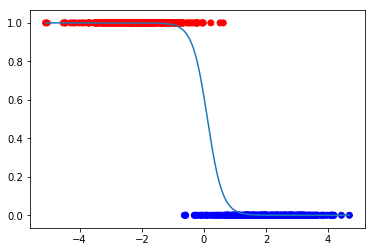

In [547]:
plt.scatter(total , target_y  , c= train_color ) ; 
plt.plot(X , Y) ; 

In [549]:
W = np.squeeze(W)
B = np.squeeze(B)


## # https://peterroelants.github.io/posts/neural-network-implementation-part02/

In [550]:
n1= 300
interval = 2.0
W_1 = np.linspace(min(W)- interval ,  max(W)+interval , n1)
B_1 = np.linspace(min(B ) - interval   , max(B )+interval , n1)
W2 , B2  = np.meshgrid(W_1,B_1)
loss_ws = np.zeros((n1, n1))

In [551]:
i , j = 150 , 105
y = sigmoid(x = X, w = W2[i,j] , b =  B2[i,j])
t = target_y
- np.mean(np.multiply(t, np.log(np.clip(y, 1e-8, 1.0 )))+ \
          np.multiply((1-t), np.log( np.clip(1 - y , 1e-8, 1.0 ))))

1.431552050241241

In [552]:
def sigmoid_v2(x) :
    sigm = 1. / (1. + np.exp(-x))
    return sigm

In [553]:
i = 0 
#z = np.dot(W2[i,:][:,np.newaxis] , X[np.newaxis ,:] ) + B2[:,i][:,np.newaxis]
z = np.dot(W2[i,:][:,np.newaxis] , X[np.newaxis ,:] ) + B2[:,i][:,np.newaxis]
z2 = sigmoid_v2(z)
d2 = - np.mean(np.multiply(t, np.log(np.clip(z2[0,:], 1e-8, 0.99999 )))+ \
                           np.multiply((1-t), np.log( np.clip(1 - z2[0,:] , 1e-8, 0.99999))))

#d = np.multiply(t, np.log(z2[0,:])) + np.multiply((1-t), np.log(1-z2[0,:]))
#d2 = -np.mean(d)
print(d2)

5.995114164365907


<div>
    <center>
        <font size = 5 > Loss Surface 그리기 위한 작업  </font>
    </center><br>
    <center>
        * 굉장히 오래 걸림. <br>
        * 애초에 구조를 잘 못 생각했을 수도 있다. <br>
        * multiprocessing으로 1시간 -> 8분 작업으로 줄임 <br>
        </center>
</div>




%%time



### 1시간 7분  매우 느림.
def loss_f(x ,  t= target_y):
    output = - np.mean(np.multiply(t, np.log(np.clip(x , 1e-8, 1.0 )))+ \
                           np.multiply((1-t), np.log( np.clip(1 - x , 1e-8, 1.0 ))))
    return output

def sq_loss_f(x ,  t= target_y):
    output = np.mean(np.square(t - x))
    return output


t = target_y
loss_ws = np.zeros((n1, n1))
for i in range(n1):
    if i % 10 == 0 :
    z = np.dot(W2[i,:][:,np.newaxis] , X[np.newaxis ,:] ) + B2[i,:][:,np.newaxis]
    z2 = sigmoid_v2(z)
    loss_ws[ i ,:] = np.apply_along_axis(loss_f, 1 , z2)
    
    
### 느림

loss_ws2 = np.zeros((n1, n1))
for i in range(n1):
    if i % 100 == 0 :
        print(i)
    for j in range(n1):
        aa = X *W2[i,j] + B2[i,j]
        #y = sigmoid(x = X, w = W2[i,j] , b =  B2[i,j])
        y = sigmoid_v2(aa)
        t = target_y
        output = - np.mean(np.multiply(t, np.log(np.clip(y, 1e-8, 1.0 ))) + \
                           np.multiply((1-t), np.log( np.clip(1 - y , 1e-8, 1.0 ))))
        print(output)
        loss_ws2[i,j] =  output

In [554]:
%%time

from multiprocessing import Pool 

def loss_f(x ,  t= target_y):
    output = - np.mean(np.multiply(t, np.log(np.clip(x , 1e-8, 1.0 )))+ \
                       np.multiply((1-t), np.log( np.clip(1 - x , 1e-8, 1.0 ))))
    return output

def sq_loss_f(x ,  t= target_y):
    output = np.mean(np.square(t - x))
    return output


def loss_f2(i) :
    z = np.dot(W2[i,:][:,np.newaxis] , X[np.newaxis ,:] ) + B2[i,:][:,np.newaxis]
    z2 = sigmoid_v2(z)
    output = np.apply_along_axis(sq_loss_f, 1 , z2)
    return output

t = target_y
output = []
if __name__ == '__main__':
    pool = Pool(10)
    results = pool.map(loss_f2 , range(n1))
    pool.close()
    pool.join()

CPU times: user 184 ms, sys: 2.24 s, total: 2.43 s
Wall time: 20.4 s


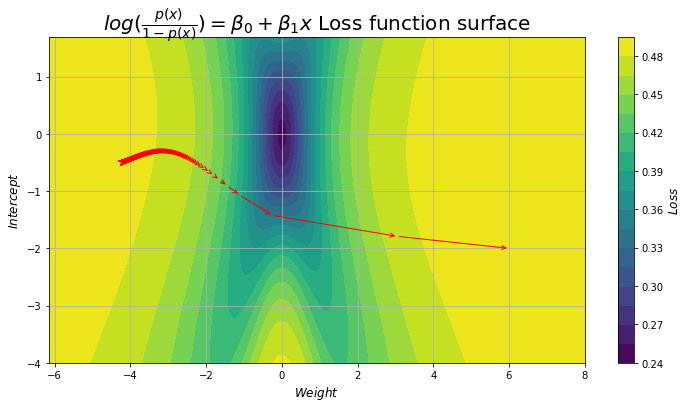

In [555]:
fig = plt.figure(figsize=(12, 6))
plt.contourf(W2, B2, results, 20, cmap=plt.cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$Loss$', fontsize=12)
W_arrow = W[::20]
B_arrow = B[::20]
for i  in np.arange(len(W_arrow)-1) :
    plt.annotate( '', xy=(W_arrow[i+1] , B_arrow[i+1] ), xytext=(W_arrow[i],B_arrow[i] ), 
                 arrowprops=dict(arrowstyle='<-' , color = "red"))                 
plt.xlabel('$Weight$', fontsize=12)
plt.ylabel('$Intercept$', fontsize=12)
plt.title(r'$log(\frac{p(x)}{1-p(x)}) = \beta_0 + \beta_1x$ Loss function surface' , fontsize = 20)
plt.grid()
plt.show()

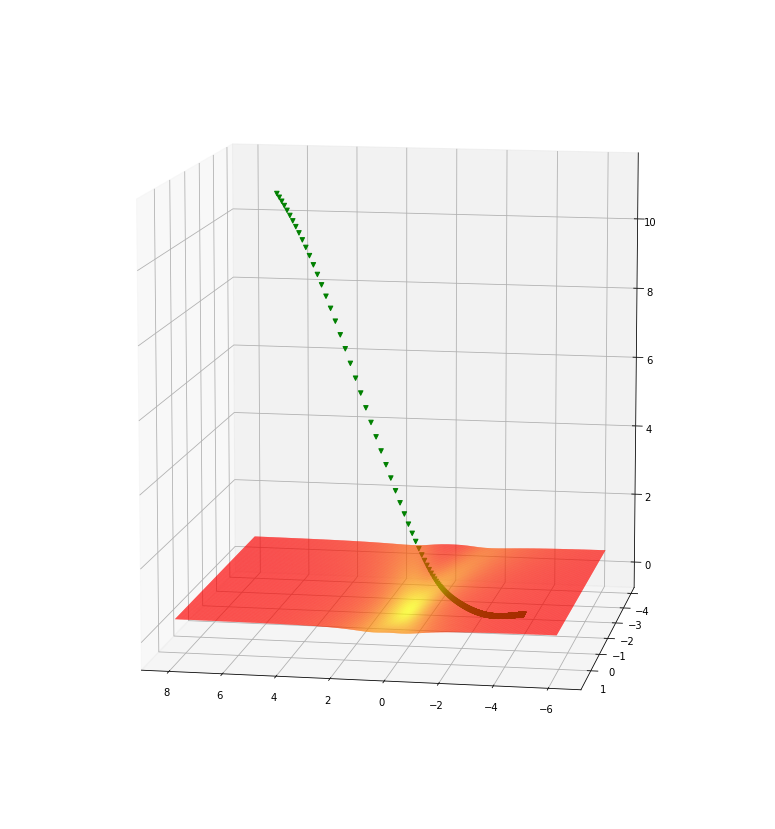

In [556]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(1,2,1 , projection='3d')
ax.plot_surface(W2, B2, np.array(results) , cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.scatter(W, B, Loss, c='green', marker='v' , linewidths = 1 , alpha = 1.0)
ax.azim = 100
ax.elev = 10
plt.show()

In [557]:
fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.contour(W2, B2, results , cmap='jet')
#Plot target (the minimum of the function)
ax1.set_xlabel(r'Weight')
ax1.set_ylabel(r'Intercept')
ind = np.unravel_index(np.argmin(np.array(results), axis=None), np.array(results).shape)
min_point = np.array([ W2[ind], B2[ind]])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_ , 'r*', markersize=10)
ax1.set_xlabel(r'Weight')
ax1.set_ylabel(r'Intercept')
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

weight_slice = W[::20]
bias_slice   = B[::20]
loss_slice   = Loss[::20]

def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    # Animate line
    line.set_data(weight_slice[:i], bias_slice[:i])
    
    # Animate points
    point.set_data(weight_slice[i], bias_slice[i])

    # Animate value display
    value_display.set_text('Min = ' + str(loss_slice[i]))

    return line, point, value_display

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(weight_slice),
                               interval=120, 
                               repeat_delay=20, blit=True)

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim